In [1]:
import scipy.io as scio
u = scio.loadmat('./u.mat')['u']
v = scio.loadmat('./v.mat')['v']

In [2]:
import numpy as np
from data.utils import *
b = np.square(u - v)/(np.square(u) + 1e-8)
real = b[:,0,:,:]
imag = b[:,1,:,:]

In [19]:
x = torch.randn(4, 4)
y = x.view(16)
print(y)

tensor([ 0.5852,  0.6956, -0.1548, -2.3408, -0.2537,  1.7729, -1.4512, -0.5147,
         0.5154,  0.5306,  0.4646, -1.0786, -1.5753,  0.5160, -0.3215,  1.3761])


In [28]:
import numpy as np

# 创建一个(1,2,256,256)的随机张量
x = b
# print(x.shape)
# 展平张量为一个一维向量
x_flat = x.reshape(-1)
top_n=10
# 找到前10个最大值及其对应的索引
top_indices = np.argsort(x_flat)[::-1][:top_n]
max_values = x_flat[top_indices]

# 将一维索引转换回四维坐标
coord_4d = np.zeros((10, 4))
for i, idx in enumerate(top_indices):
    coord_4d[i,:] = np.unravel_index(idx, (1,2,256,256))

print(max_values)
print('------------------------------------------------------------')
print(coord_4d)


[2.3152650e+09 8.0777549e+08 7.5428986e+08 6.2026272e+08 3.2672493e+08
 1.9763874e+08 1.6569104e+08 8.4094168e+07 5.7750728e+07 3.5558116e+07]
------------------------------------------------------------
[[  0.   1. 104. 235.]
 [  0.   0. 228. 179.]
 [  0.   1.   1.  67.]
 [  0.   1. 137. 117.]
 [  0.   1.  18.  61.]
 [  0.   1.  66.  25.]
 [  0.   0.  23.  83.]
 [  0.   0.  27. 178.]
 [  0.   1.  50.  83.]
 [  0.   1. 227.  34.]]


In [47]:
import numpy as np

count = np.count_nonzero(x > 1e5)
print(count)

205


In [52]:
import numpy as np

# 创建一个(1,2,256,256)的随机张量
x = b
# print(x.shape)
# 展平张量为一个一维向量
x_flat = x.reshape(-1)
top_n=205
# 找到前10个最大值及其对应的索引
top_indices = np.argsort(x_flat)[::-1][:top_n]
max_values = x_flat[top_indices]

# 将一维索引转换回四维坐标
coord_4d = np.zeros((top_n, 4))
for i, idx in enumerate(top_indices):
    coord_4d[i,:] = np.unravel_index(idx, (1,2,256,256))

# print(max_values)
# print('------------------------------------------------------------')
# print(coord_4d)
# print(coord_4d)


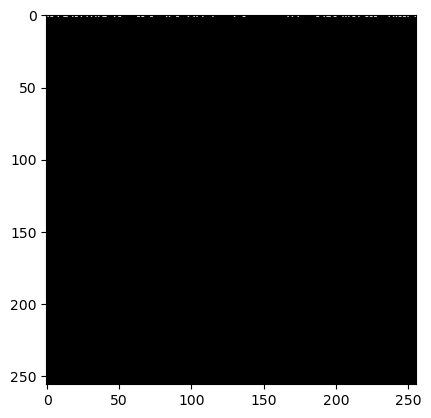

In [65]:
new_ind=coord_4d[:,2:]
new_ind=new_ind.astype(int)

# print(new_ind)
a=np.zeros((256,256))
a[new_ind[:, 0], new_ind[:, 1]] = 1

import matplotlib.pyplot as plt
plt.imshow(a,cmap='gray')
# print(np.unique(a))


Text(0.5, 1.0, 'imag_part')

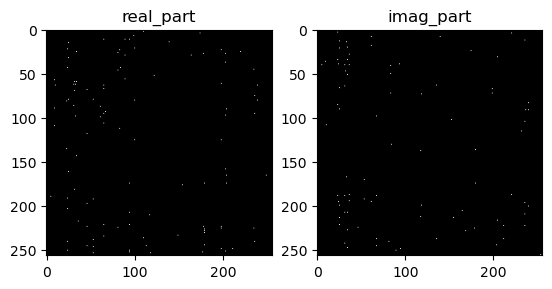

In [76]:
new_ind=coord_4d[:,1:]
new_ind=new_ind.astype(int)
# print('new_ind:',new_ind)
# print(new_ind)
a=np.zeros((2,256,256))
# print('new_ind[0,:, 0]:',new_ind[:, 0])
a[new_ind[:, 0], new_ind[:, 1], new_ind[:, 2]] = 1

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(a[0,:,:].squeeze(),cmap='gray')
plt.title('real_part')

plt.subplot(122)
plt.imshow(a[1,:,:].squeeze(),cmap='gray')
plt.title('imag_part')
# print(np.unique(a))


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建一个 5x5 的二维数组
arr = a

# # 创建一个网格，用于表示每个数据点的位置
# x, y = np.meshgrid(np.arange(arr.shape[0]), np.arange(arr.shape[1]))

# # 创建一个 3D 图形对象
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # 画出 3D 图形
# ax.plot_surface(x, y, arr)

# # 设置坐标轴标签
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.set_zlim(np.min(arr), np.max(arr))
# # 显示图形
# plt.show()
print(np.max(arr))

1.0


In [3]:
print(np.max(real), np.argmax(real))
print(np.max(imag), np.argmax(imag))

807775500.0 58547
2315265000.0 26859


In [4]:
print(58547 / 256)
print(58547 % 256)
print(u[:,0, 228, 179], v[:,0, 228, 179])

228.69921875
179
[0.0001487] [5.093156]


In [5]:
print(26859/256)
print(26859% 256)
print(u[:,1, 104, 235], v[:,1, 104, 235])

104.91796875
235
[8.761485e-05] [-6.3972135]


In [6]:
loss_mask = scio.loadmat('./loss_mask.mat')['loss_mask']

In [10]:
ud = u[loss_mask > 0.001]
vd = v[loss_mask > 0.001]

print(u.max(),v.max())

4412.591 4385.368


In [11]:
de = np.square(ud - vd) / (np.square(vd) + np.mean(np.sqrt(np.sum(np.square(vd)))))
print(np.max(de), np.min(de))
print('np.mean(np.sqrt(np.sum(np.square(vd)))):',np.mean(np.sqrt(np.sum(np.square(vd)))))

3.0171628 4.94576e-13
np.mean(np.sqrt(np.sum(np.square(vd)))): 8772.177


np.mean(np.sqrt(np.sum(np.square(vd))))数值过大
如何除以一个对最小值影响不大的量